## `Influence of Machine Learning on the Diagnosis of Cardiovascular Diseases`

### `Problem Statement`

Cardiovascular Diseases (CVDs) are considered the leading cause of mortality globally, with at least `80%` of deaths associated with heart disease and strokes in individuals below the age of `70 years` (Rana et al., 2025). Indications that a patient has CVD are high levels of biomarkers in their blood, significant chest pain and abnormal readings on an ECG. Surprisingly, a lot of patients with CVD are difficult to diagnose using ECG when their results are largely normal. Therefore, the use of AI approaches can make a significant difference in how we diagnose CVD, ultimately improving the outcomes.

### `Objectives`

#### `General Objective`
- To develop a machine learning predictive model to aid in the diagnosis of cardiovascular diseases.

#### `Specific Objectives`

- To examine the appliations of machine learning in the diagnosis of CVDs.
- To evaluate the accuracy of machine learning tools in the diagnosis of CVDs.
- To design a machine learning model to diagnose CVDs.
- To evaluate and validate the developed CVDs diagnosing machine learning model using performance metrics.

### `Data Understanding`

The source of the data is: [kaggle](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)

`DISCLAIMER:` Kaggle datasets are meant for simulations and modelling, and not necessarily reflect the real word context.

The data used in this study comprises of: 
- `Age` | Objective Feature | age | int (days)
- `Height` | Objective Feature | height | int (cm) |
- `Weight` | Objective Feature | weight | float (kg) |
- `Gender` | Objective Feature | gender | categorical code |
- `Systolic blood pressure` | Examination Feature | ap_hi | int |
- `Diastolic blood pressure` | Examination Feature | ap_lo | int |
- `Cholesterol` | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- `Glucose` | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- `Smoking` | Subjective Feature | smoke | binary |
- `Alcohol intake` | Subjective Feature | alco | binary |
- `Physical activity` | Subjective Feature | active | binary |
- `Presence or absence of cardiovascular disease` | Target Variable | cardio | binary |

### `Performance Metrics`

- `Precision`: The desired precision score for this diagnosis support system is of range `0.80 - 0.95+`. Critical for minimizing unnecessary treatments.
- `Recall`: Recall score equal or greater than `0.85`. Important for not missing real disease cases.
- 

### `Libraries`

In [38]:
# Custom
from functions import duplicated
# Standard
import pandas as pd 
import numpy as np 
import scipy.stats as st
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### `Load the data`

In [39]:
data = pd.read_csv("archive\cardio_train.csv", index_col=0, sep=";")

print("Shape of data: ", data.shape)
data.head(10)

Shape of data:  (70000, 12)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
8,21914,1,151,67.0,120,80,2,2,0,0,0,0
9,22113,1,157,93.0,130,80,3,1,0,0,1,0
12,22584,2,178,95.0,130,90,3,3,0,0,1,1
13,17668,1,158,71.0,110,70,1,1,0,0,1,0


In [40]:
# Duplicated records
duplicated(data)

'Number of duplicated records: 24'

- The data has no missing records.
- The data has 24 duplicated records.

### `Data Handling`

#### `Age and Gender`
- Change the age column from days to years.
- `Assumption:` One year is equal to 365 days.

In [41]:
data["age"] = data["age"].apply(lambda x: x//365) # Floor division to round down the age to the nearest whole number
data.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
8,60,1,151,67.0,120,80,2,2,0,0,0,0
9,60,1,157,93.0,130,80,3,1,0,0,1,0
12,61,2,178,95.0,130,90,3,3,0,0,1,1
13,48,1,158,71.0,110,70,1,1,0,0,1,0


### `Exploratory Data Analysis`

#### `Age`

Skew:  -0.3057373469819291


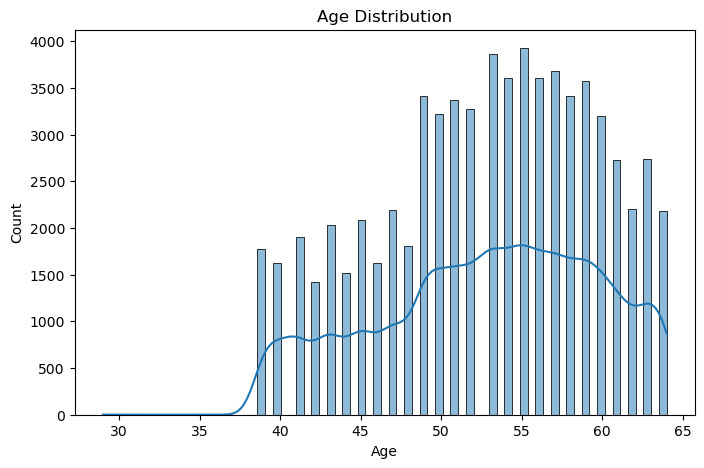

In [42]:
# Mean age
mean_age = np.mean(data['age'])

# Determine the skew
print("Skew: ", st.skew(data['age']))

# Distribution of the age variable
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=data['age'], kde=True)
ax.set_title("Age Distribution")
ax.set_xlabel("Age")

plt.show()

In [43]:
# Gender distribution ~ replace 1 with 'female' and 2 with 'male'
data['gender'].replace({1:'female', 2:'male'}, inplace=True)


The gender distribution is imbalanced, with a difference of:  21060


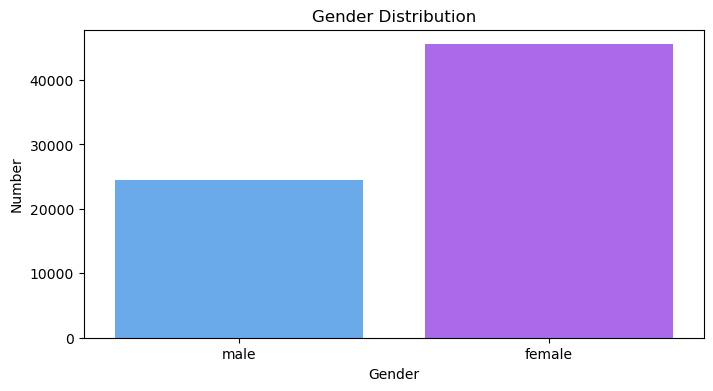

In [44]:
# Gender distribution
data_points = data['gender'].value_counts(ascending=True)
# Check data imbalance
if (data_points.values[0] != data_points.values[1]):
    print('The gender distribution is imbalanced, with a difference of: ', np.abs(data_points.values[0]-data_points.values[1]))

# Visual
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=data_points.index, y=data_points.values, palette='cool')
ax.set_title('Gender Distribution')
ax.set_ylabel('Number')
ax.set_xlabel('Gender')

plt.show()

In [45]:
# Age and gender distribution
data.groupby('gender')['age'].aggregate(['min','max','mean','std'])

,min,max,mean,std
gender,,,,
female,29,64,52.954338,6.670351
male,29,64,52.629179,6.937803


- `The data is efficiently spread out, given the standard deviation of approximately 6 units from the mean for both genders.`
- `The data consists of age range between 29 - 64 for both genders.`
- `The mean of the data is almost similar for both genders, signifying balance in age distribution.`

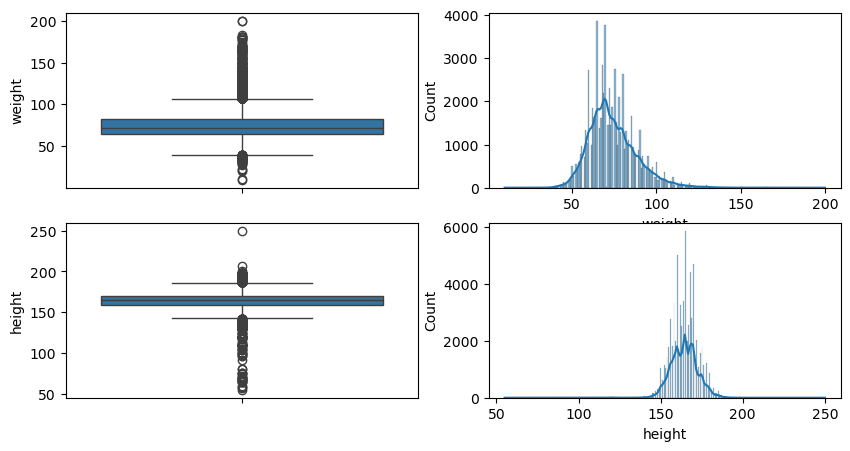

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
sns.boxplot(data=data['weight'], ax=axes[0][0])
sns.histplot(data=data['weight'], ax=axes[0][1], kde=True)
sns.boxplot(data=data['height'], ax=axes[1][0])
sns.histplot(data=data['height'], ax=axes[1][1], kde=True)

plt.show()

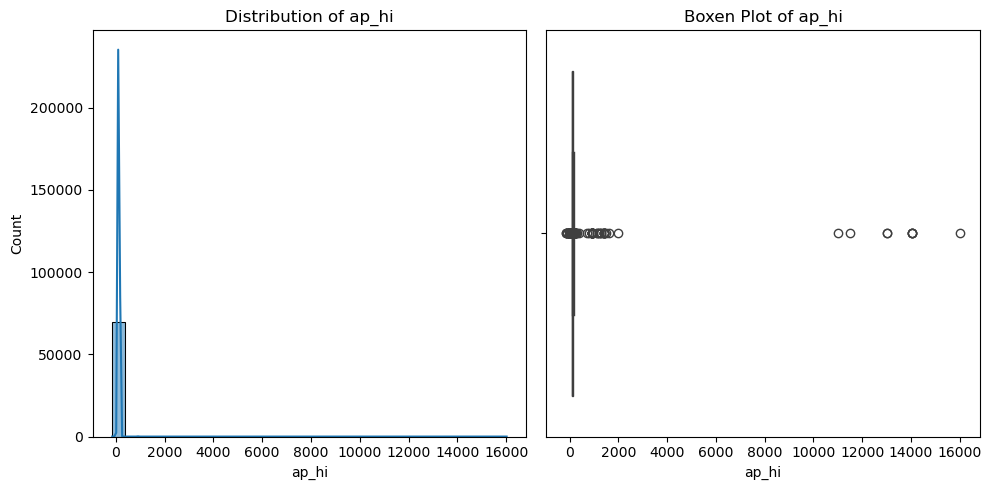

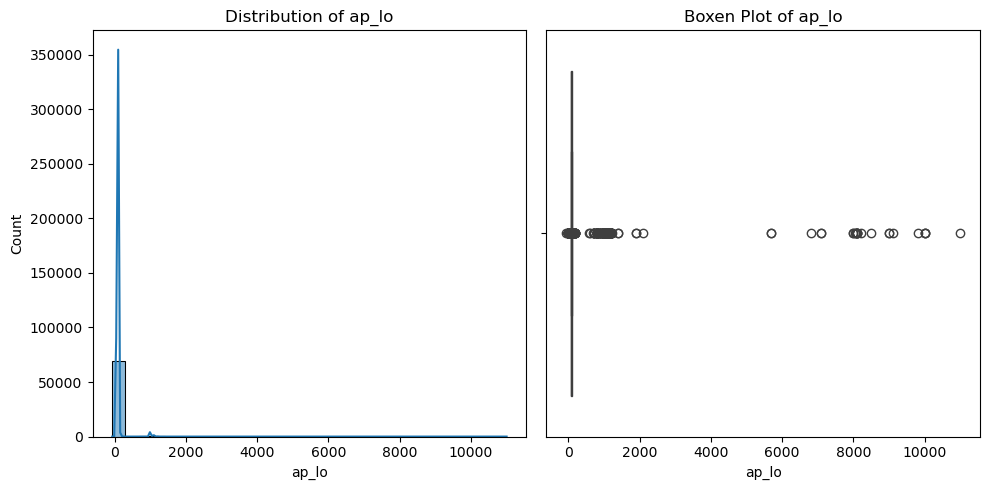

In [47]:
features = ["ap_hi", "ap_lo"] # Continuous data

for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Histogram + KDE
    sns.histplot(data[feature], kde=True, bins=30, ax=axes[0])
    axes[0].set_title(f"Distribution of {feature}")
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel("Count")

    # Boxen plot
    sns.boxplot(x=data[feature], ax=axes[1])
    axes[1].set_title(f"Boxen Plot of {feature}")
    axes[1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

#### `Data Handling`

- Filter the records with impractical heights and weights. Plausible adult height range according to WHO is `140 - 200 cm`.
- Filter the records with weights that are implausible. The range to use in this data is between `35 - 200 Kgs`. Where 200Kgs is the highest recorded weight point in the data. 
- Filter records with `ap_lo` and `ap_hi`   values as negative and beyond the physiologically impossible range ~ `ap_hi: [70-300]` and `p_lo: [40-200]`. 
- The data should also have the `systolic (ap_hi) > distolic (ap_lo)`. 

In [48]:
# Data handling for:
# Height
data = data[(data['height'] >= 140) & data['height'] <= 200]

# Weight
data = data[data['weight'] >= 35]

# Systolic and diastolic blood pressure with `ap_hi` > `ap_lo` 
data = data[(data['ap_hi'] >= 70) & 
            (data['ap_hi'] <= 300) & 
            (data['ap_lo'] >= 40) & 
            (data['ap_lo'] <= 200) &
            (data['ap_hi'] > data['ap_lo'])]

#### `Binary Features`

In [50]:
# Other binary features
binary_feat = data[['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']]

# Function for barplot visual of thecolumns
def feat_viz(feature, name):
    # Value counts
    val_count = feature.value_counts(ascending=False)

    fig, ax = plt.subplots(figsize=(8,4))
    sns.barplot(x=val_count.index, y=val_count.values, palette='cool')

    ax.set_title(f"{name} Distribution")

    plt.show()
    

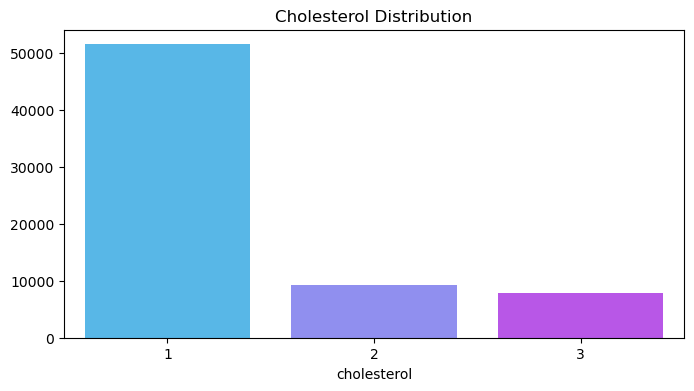

In [51]:
# 'cholesterol' feature
feat_viz(binary_feat['cholesterol'], "Cholesterol")

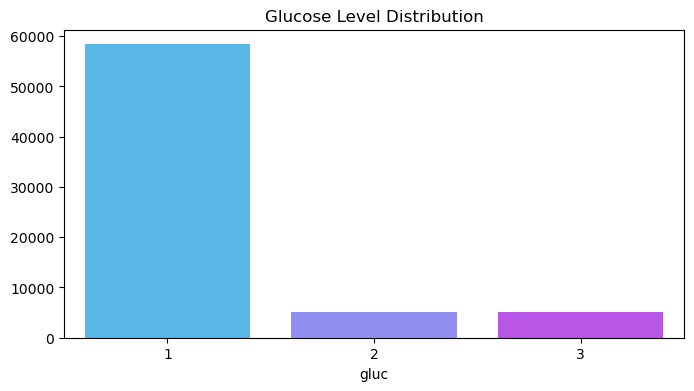

In [52]:
# 'gluc'
feat_viz(binary_feat['gluc'], "Glucose Level") 

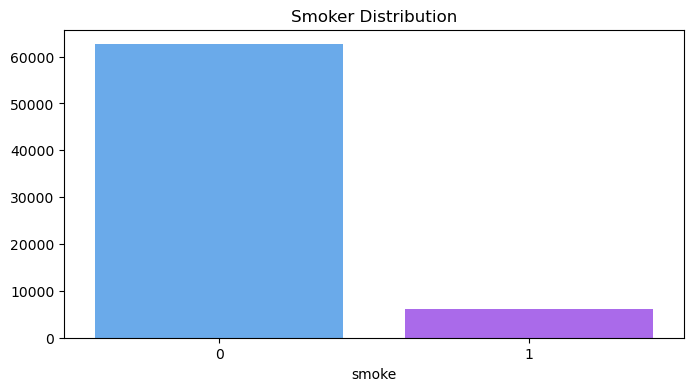

In [53]:
# 'smoke' feature
feat_viz(binary_feat['smoke'], "Smoker")

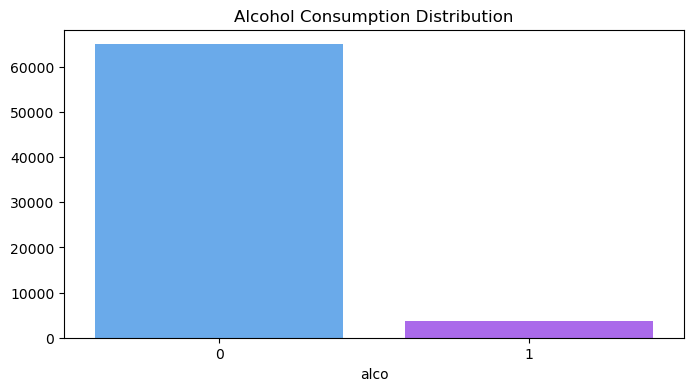

In [54]:
# 'alco' feature
feat_viz(binary_feat['alco'], "Alcohol Consumption")

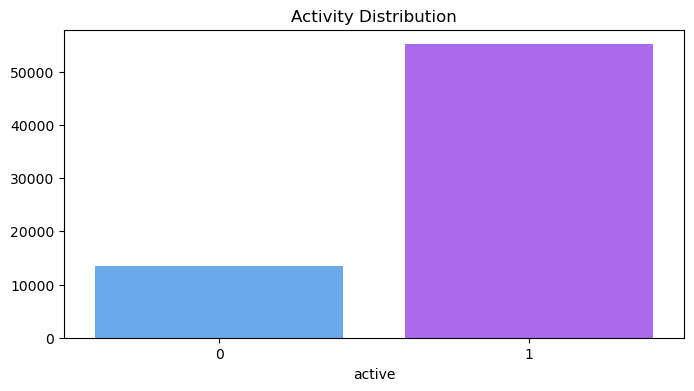

In [55]:
# `active` feature
feat_viz(binary_feat['active'], "Activity")

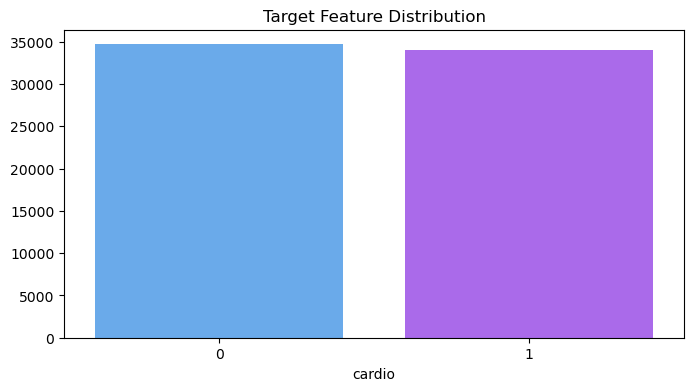

In [56]:
# Target class distribution ~ 'cardio'
feat_viz(binary_feat['cardio'], "Target Feature")

### `Feature Engineering`

#### `Body-Mass Index (BMI)`

`NOTE:` Higher BMI, particularly in the overweight and obese ranges, is associated with an increased risk of developing various cardiovascular diseases (CVDs). Obesity, often indicated by a high BMI, is a major contributor to the development of other CVD risk factors.
- The BMI will be determined using the formula: 
BMI = weight (kg) / height (m)$^2$ 

In [57]:
# BMI for the data
data['bmi'] = round(data['weight']/(data['height']/100)**2, 1)

## `Bivariate Analysis`

### `References`

- Rana, N., Sharma, K., & Sharma, A. (2025). Diagnostic strategies using AI and ML in cardiovascular diseases: Challenges and future perspectives. In Deep Learning and Computer Vision: Models and Biomedical Applications: Volume 1 (pp. 135-165). Singapore: Springer Nature Singapore. https://link.springer.com/chapter/10.1007/978-981-96-1285-7_7